<a href="https://colab.research.google.com/github/Shamil2007/DataAnalysis/blob/main/airlines_flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download rohitgrewal/airlines-flights-data

Dataset URL: https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data
License(s): DbCL-1.0
  0% 0.00/2.33M [00:00<?, ?B/s]
100% 2.33M/2.33M [00:00<00:00, 618MB/s]


In [3]:
!unzip /content/airlines-flights-data.zip

Archive:  /content/airlines-flights-data.zip
  inflating: airlines_flights_data.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/airlines_flights_data.csv")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
del df["index"]

In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df.isna().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


#What are the airlines in the dataset, accompanied by their frequencies?

In [10]:
df["airline"].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


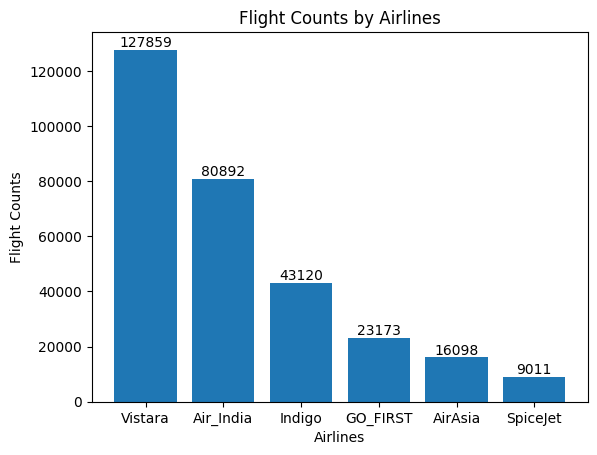

In [11]:
airline_counts = df["airline"].value_counts()

bars = plt.bar(airline_counts.index, airline_counts.values)
plt.title("Flight Counts by Airlines")
plt.xlabel("Airlines")
plt.ylabel("Flight Counts")
plt.bar_label(bars, labels=airline_counts.values)
plt.show()

#Show Bar Graphs representing the Departure Time & Arrival Time

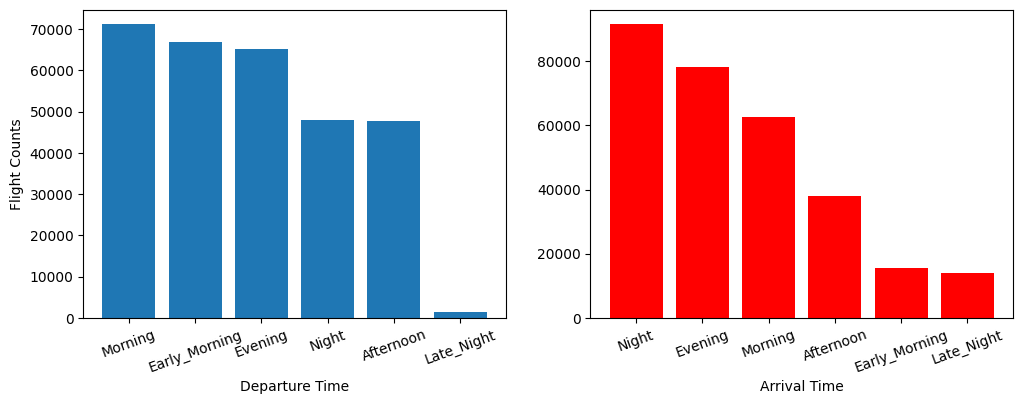

In [12]:
departure_time = df['departure_time'].value_counts()
arrival_time = df['arrival_time'].value_counts()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(departure_time.index, departure_time.values)
plt.xlabel("Departure Time")
plt.ylabel("Flight Counts")
plt.xticks(rotation=20)

plt.subplot(1, 2, 2)
plt.bar(arrival_time.index, arrival_time.values, color="Red")
plt.xlabel("Arrival Time")
plt.xticks(rotation=20)

plt.show()

#Show Bar Graphs representing the Source City & Destination City.

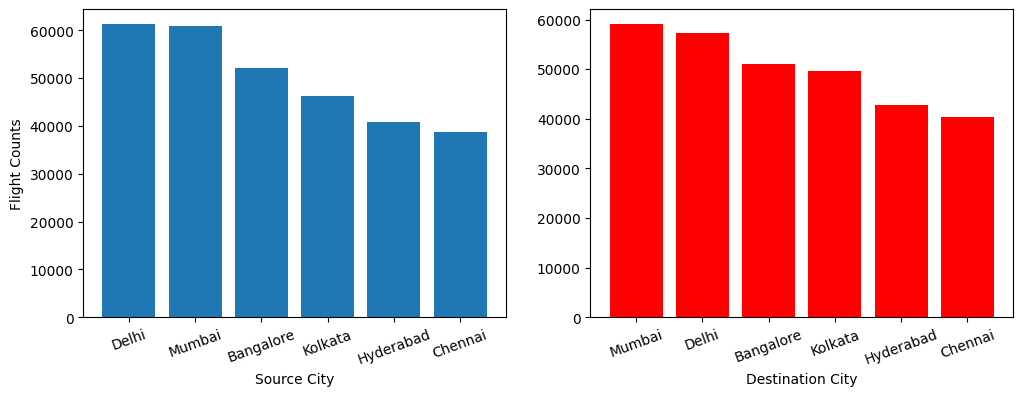

In [13]:
source_city = df['source_city'].value_counts()
destination_city = df['destination_city'].value_counts()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(source_city.index, source_city.values)
plt.xlabel("Source City")
plt.ylabel("Flight Counts")
plt.xticks(rotation=20)

plt.subplot(1, 2, 2)
plt.bar(destination_city.index, destination_city.values, color="Red")
plt.xlabel("Destination City")
plt.xticks(rotation=20)

plt.show()

#Does price varies with airlines?

In [14]:
df["route"] = df['source_city'] + " - " + df['destination_city']
df["route"].value_counts()

,count
route,
Delhi - Mumbai,15289
Mumbai - Delhi,14809
Delhi - Bangalore,14012
Bangalore - Delhi,13756
Bangalore - Mumbai,12939
Mumbai - Bangalore,12885
Mumbai - Kolkata,12602
Delhi - Kolkata,11934
Kolkata - Mumbai,11467


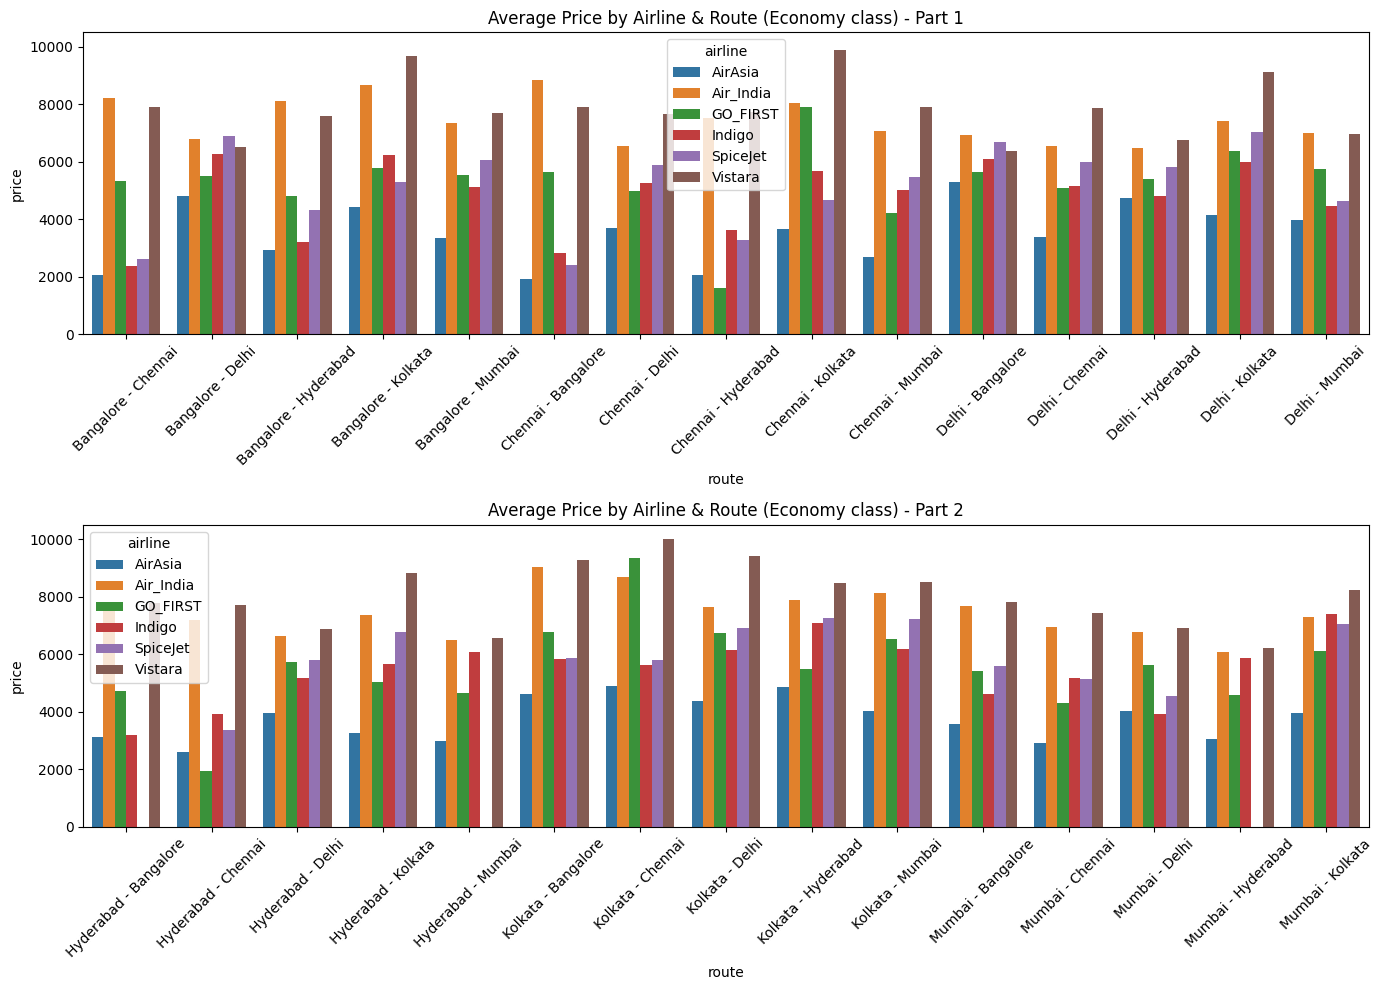

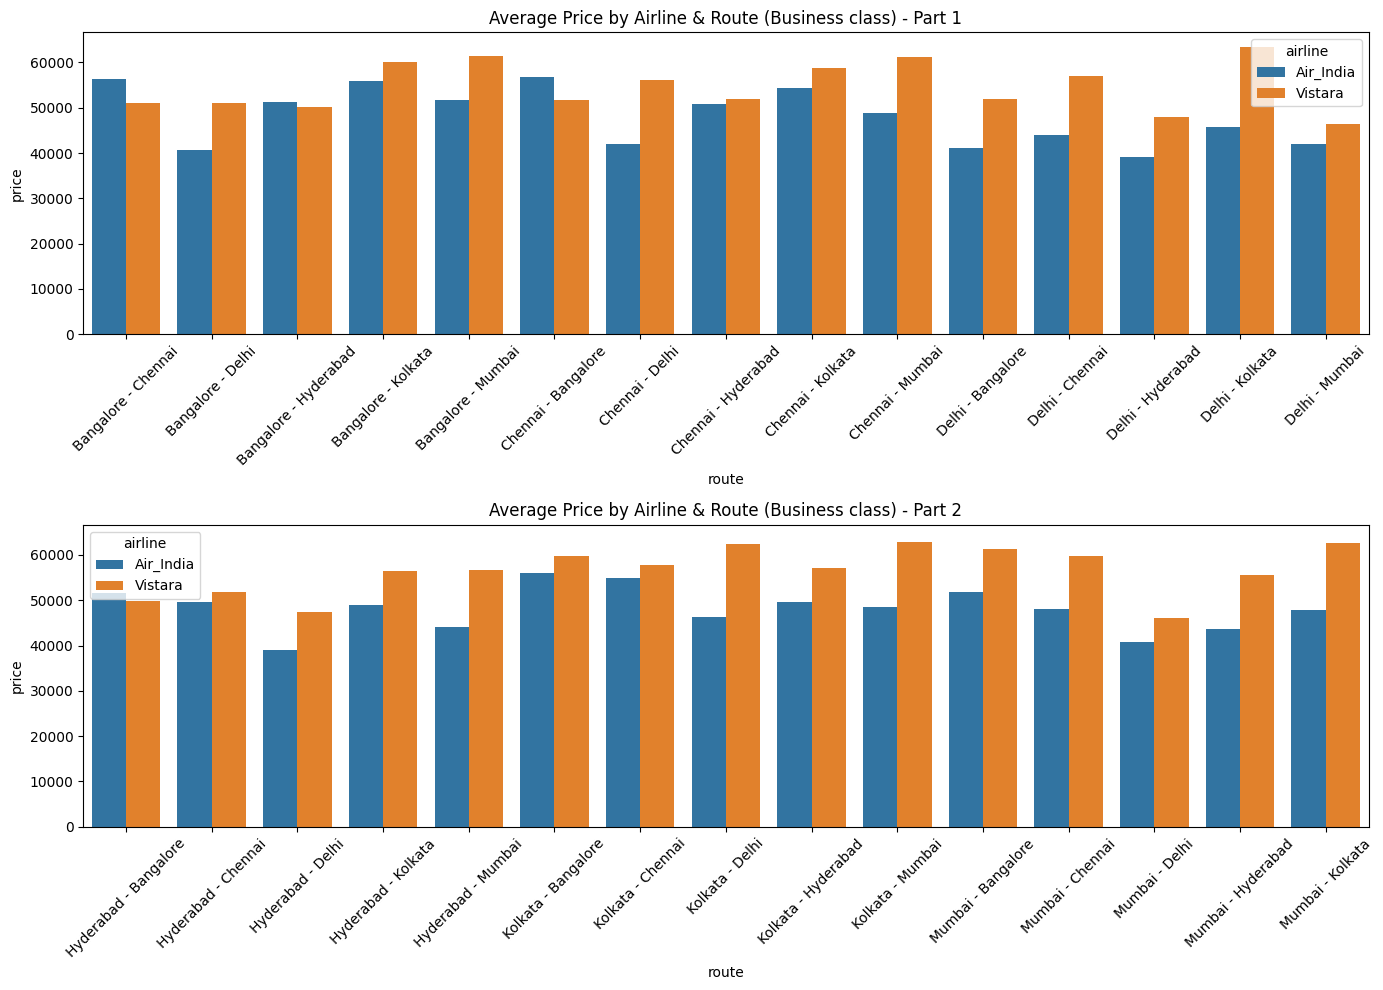

In [15]:
flight_classes = df['class'].unique()

for _class in flight_classes:
    df_class = df[df['class'] == _class].copy()

    airline_route_difference = df_class.groupby(["airline", "route"])["price"].mean().reset_index()

    routes = airline_route_difference["route"].unique()
    mid = len(routes) // 2
    first_half = routes[:mid]
    second_half = routes[mid:]

    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharey=True)

    sns.barplot(x="route", y="price", hue="airline",
                data=airline_route_difference[airline_route_difference["route"].isin(first_half)],
                ax=axes[0])
    axes[0].set_title(f"Average Price by Airline & Route ({_class} class) - Part 1")
    axes[0].tick_params(axis='x', rotation=45)

    sns.barplot(x="route", y="price", hue="airline",
                data=airline_route_difference[airline_route_difference["route"].isin(second_half)],
                ax=axes[1])
    axes[1].set_title(f"Average Price by Airline & Route ({_class} class) - Part 2")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

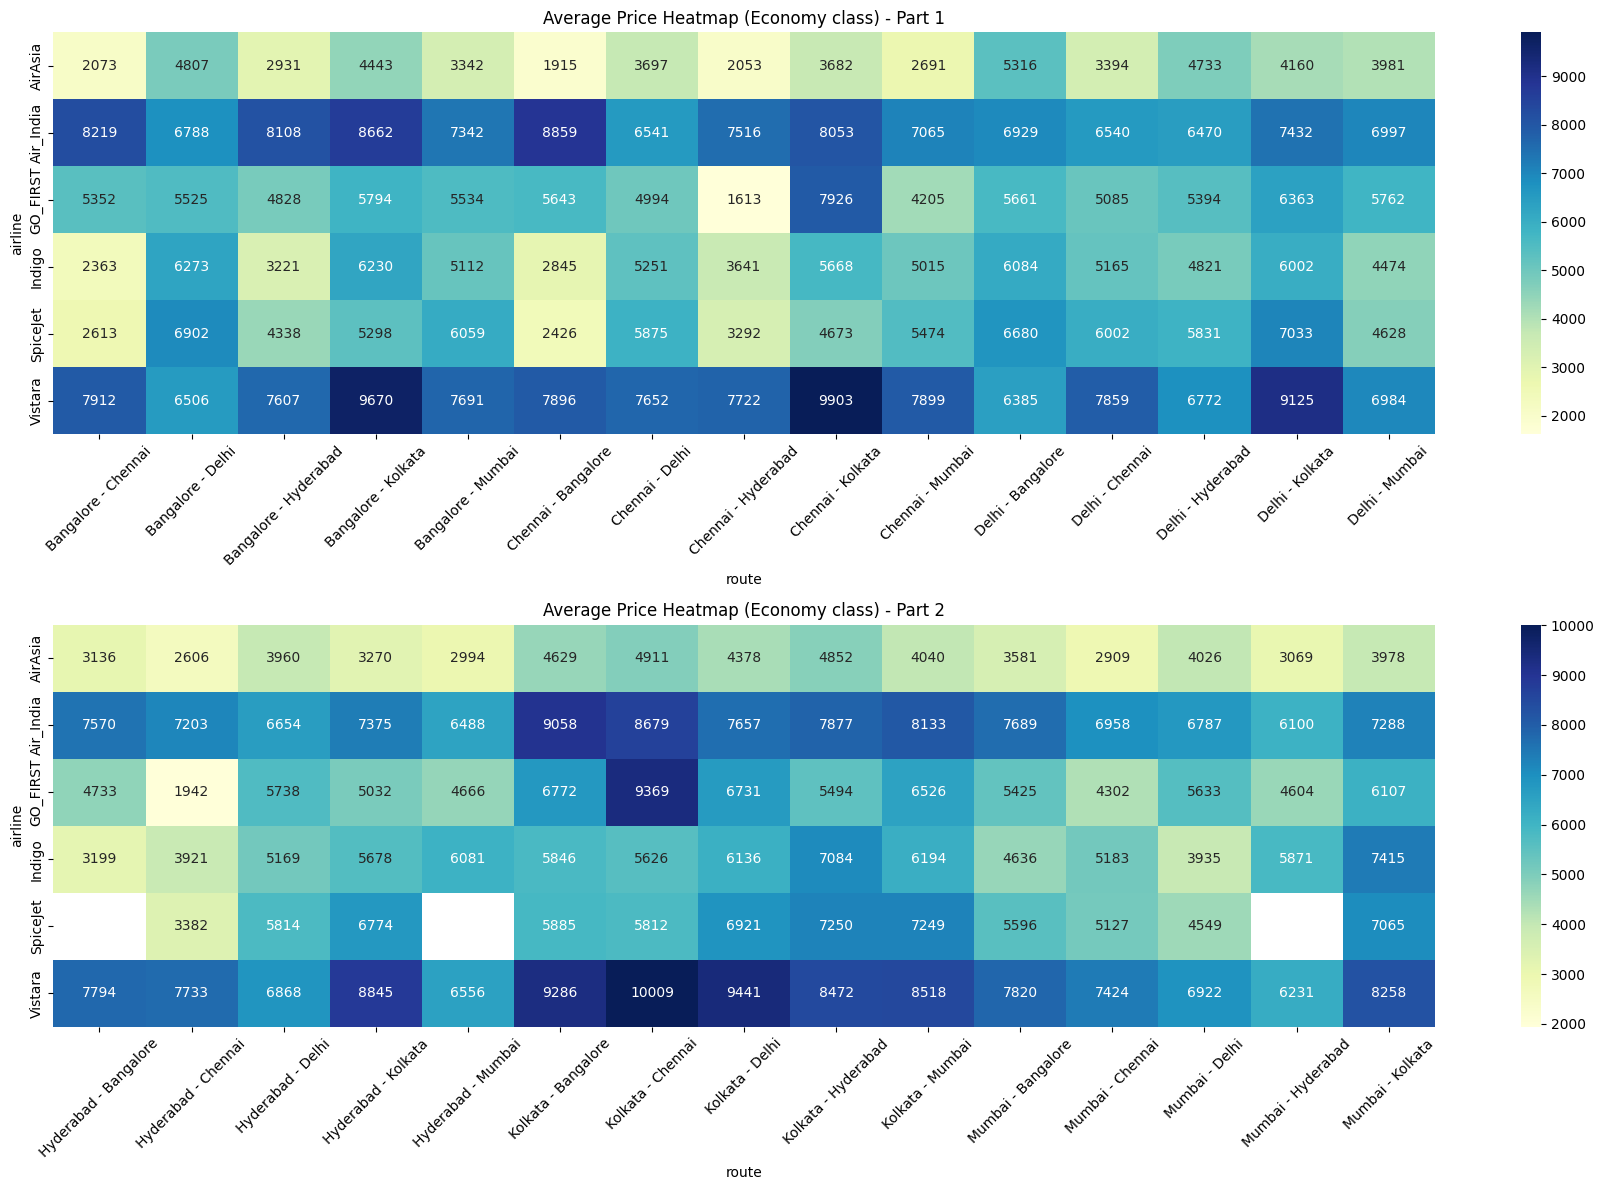

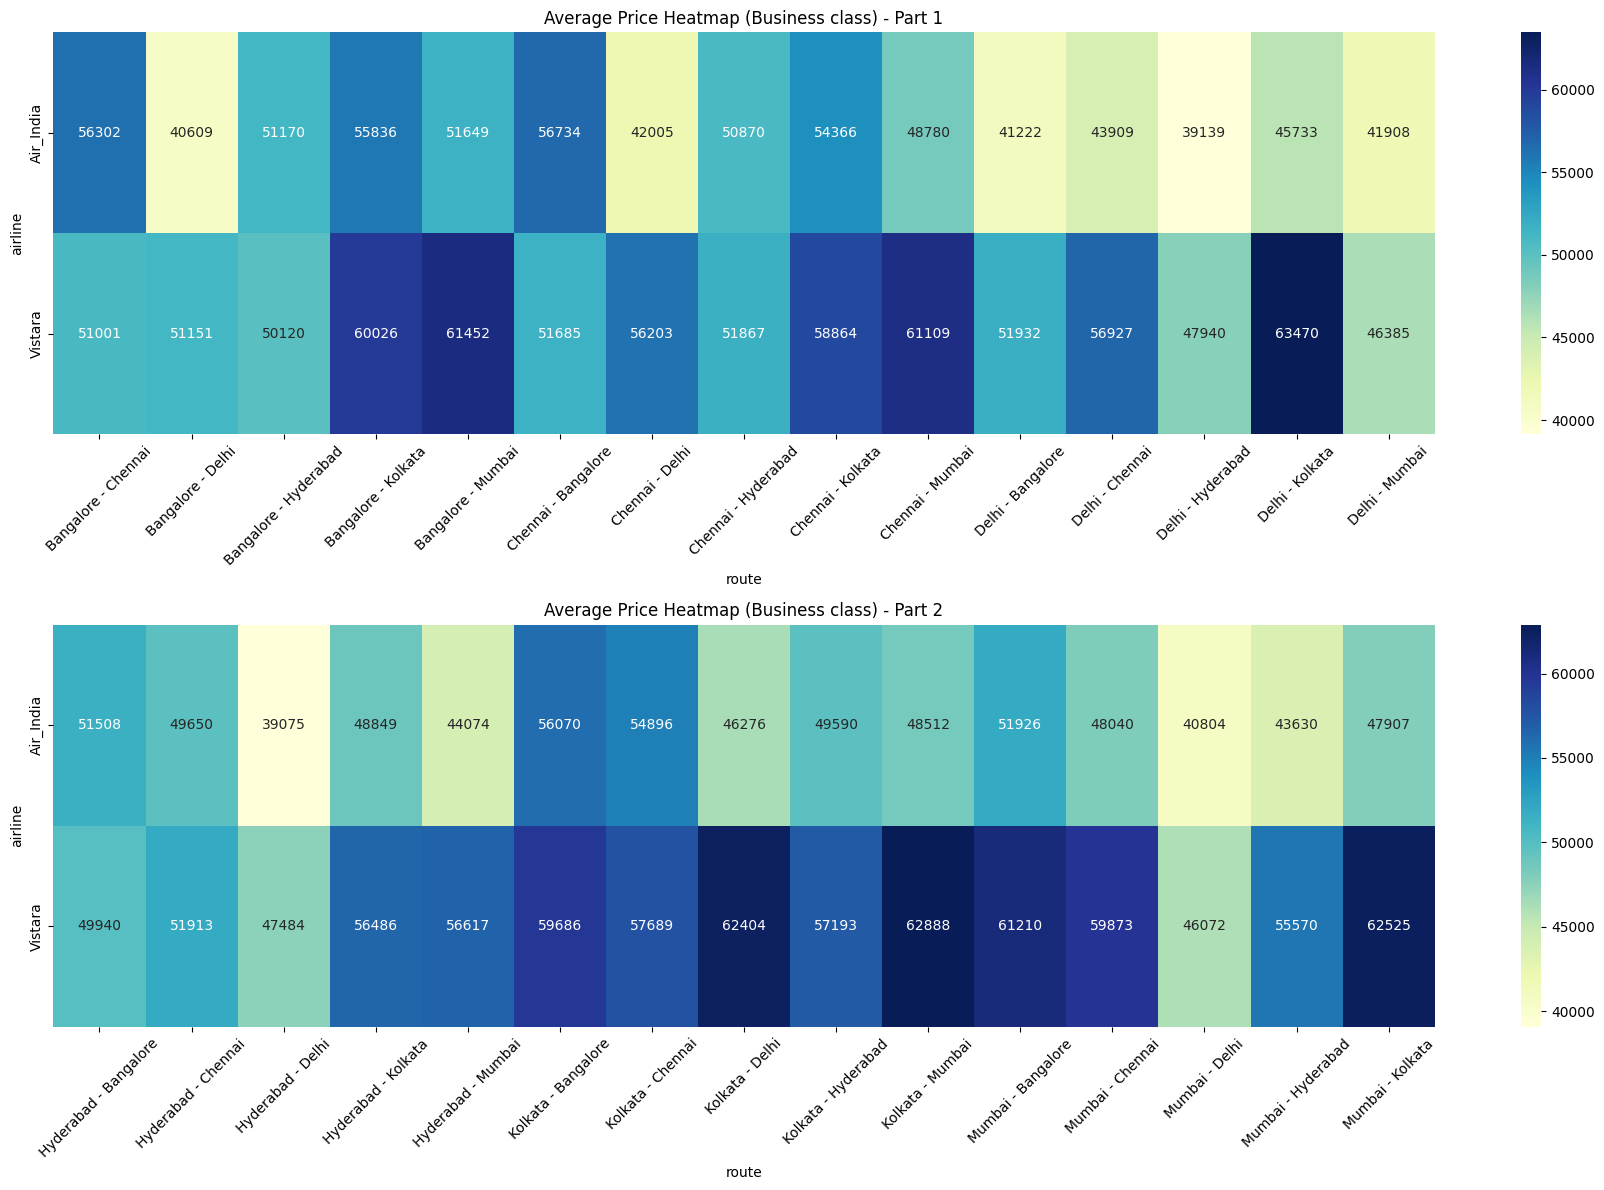

In [16]:
for _class in flight_classes:
    df_class = df[df['class'] == _class].copy()

    airline_route_difference = df_class.groupby(["airline", "route"])["price"].mean().reset_index()

    pivot_table = airline_route_difference.pivot(index="airline", columns="route", values="price")

    fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=False, sharey=True)

    sns.heatmap(pivot_table[first_half], annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[0])
    axes[0].set_title(f"Average Price Heatmap ({_class} class) - Part 1")
    axes[0].tick_params(axis='x', rotation=45)

    sns.heatmap(pivot_table[second_half], annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[1])
    axes[1].set_title(f"Average Price Heatmap ({_class} class) - Part 2")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

#Does ticket price change based on the departure time and arrival time?

In [17]:
df_grouped = df.groupby(["route", "airline", "class", "departure_time", "arrival_time"])["price"].mean().reset_index()

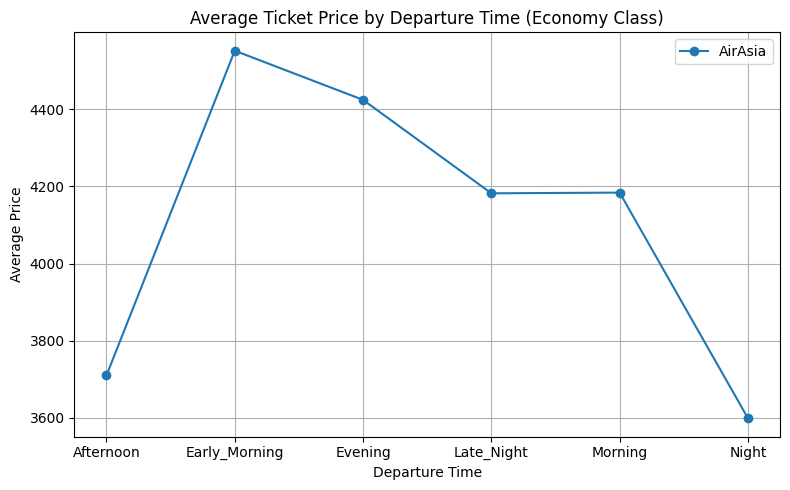

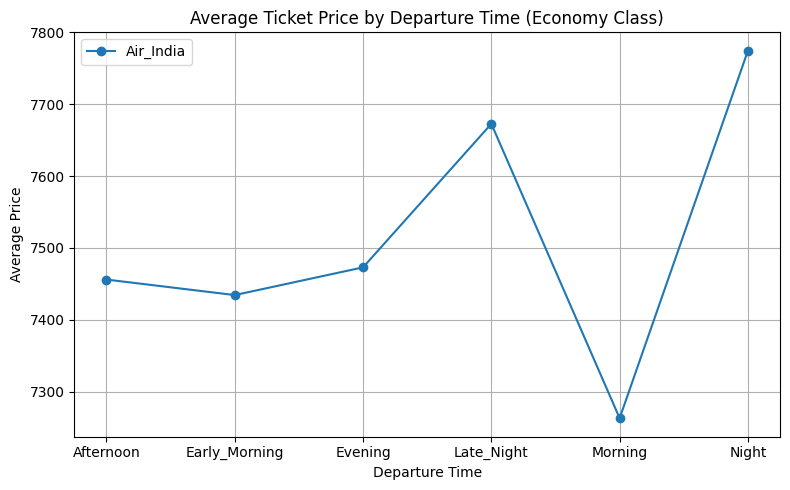

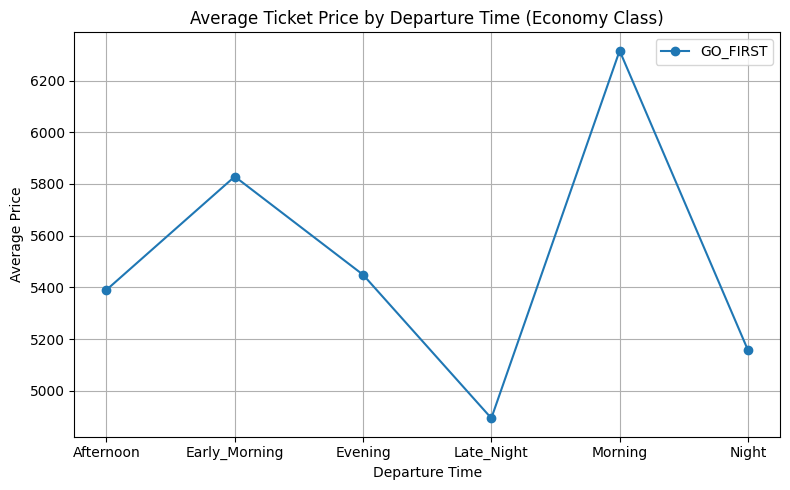

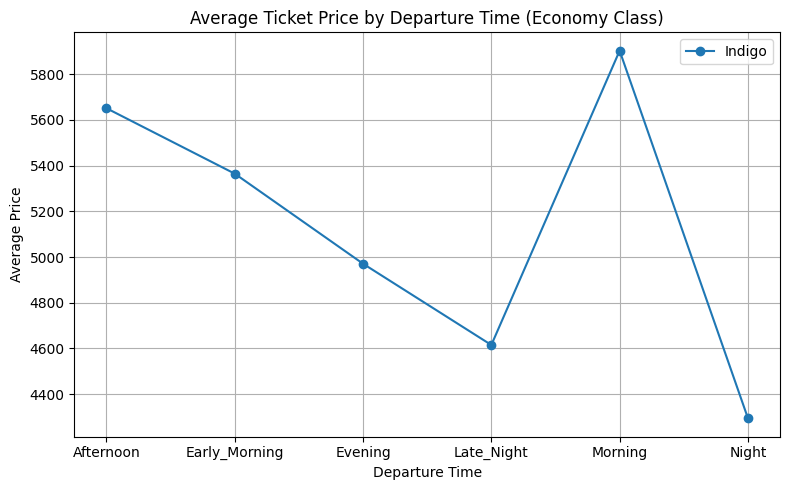

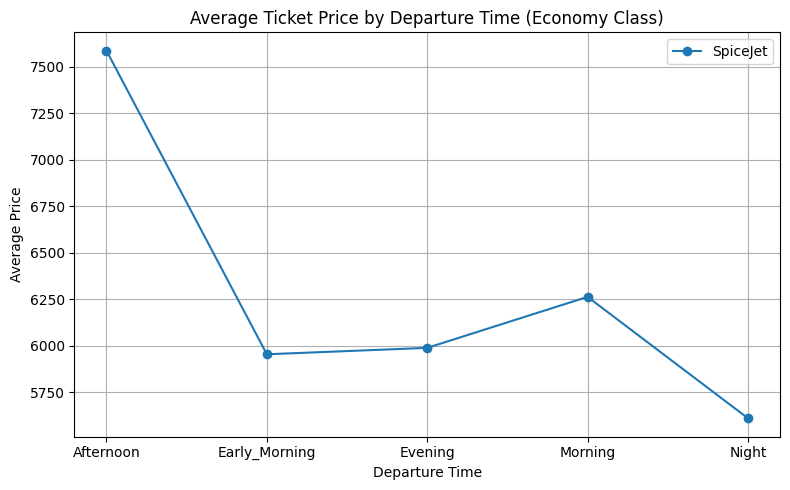

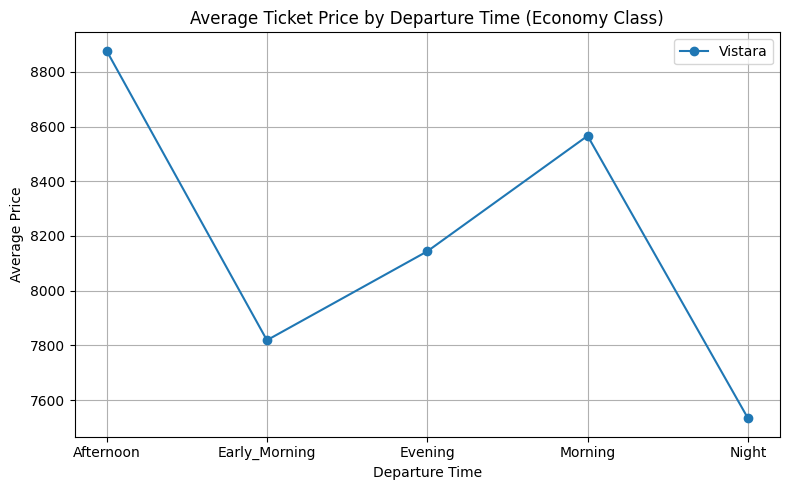

<Figure size 800x500 with 0 Axes>

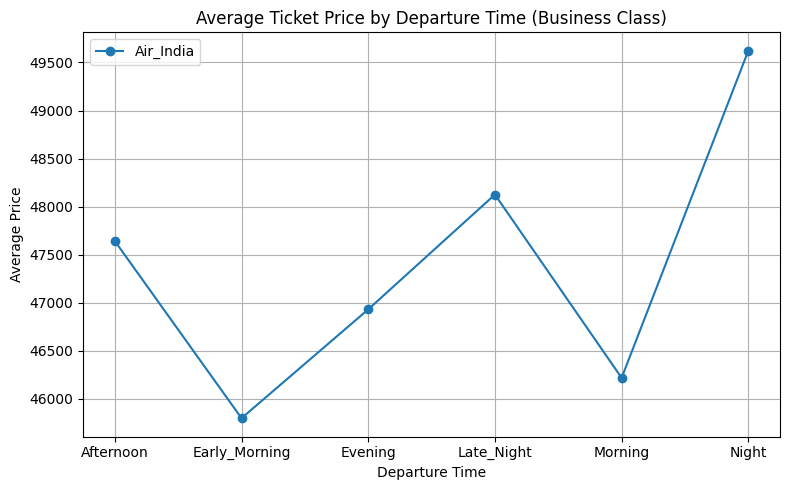

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

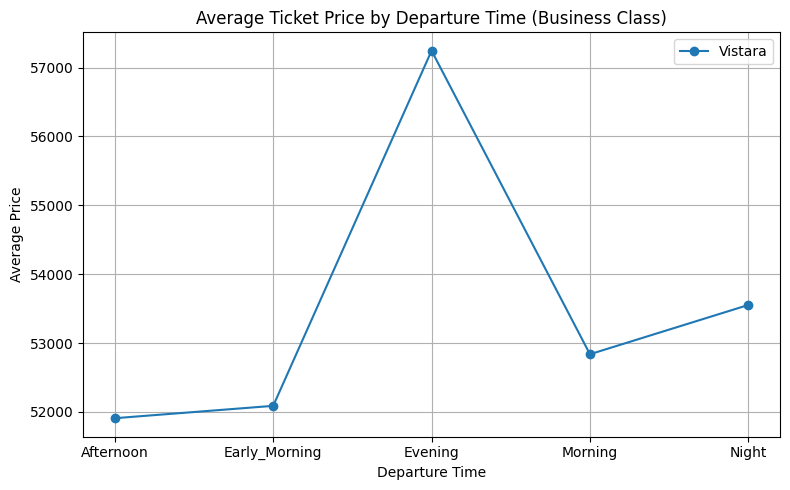

In [18]:
airlines = df_grouped['airline'].unique()

for _class in flight_classes:
    for airline in airlines:
        plt.figure(figsize=(8, 5))
        df_subset = df_grouped[
            (df_grouped['airline'] == airline) &
            (df_grouped['class'] == _class)
        ]

        if df_subset.empty:
            continue

        avg_price_dep = df_subset.groupby('departure_time')['price'].mean()

        plt.plot(avg_price_dep.index, avg_price_dep.values, marker='o', label=airline)

        plt.title(f"Average Ticket Price by Departure Time ({_class} Class)")
        plt.xlabel("Departure Time")
        plt.ylabel("Average Price")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#How the price changes with change in Source and Destination?

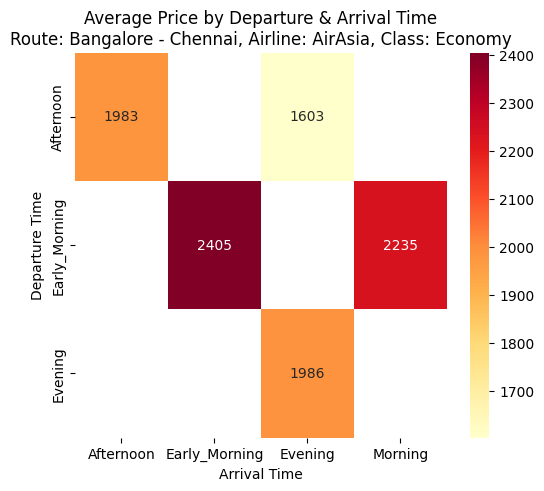

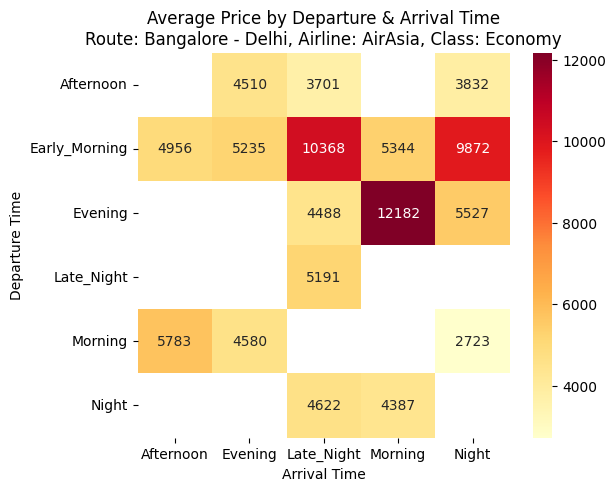

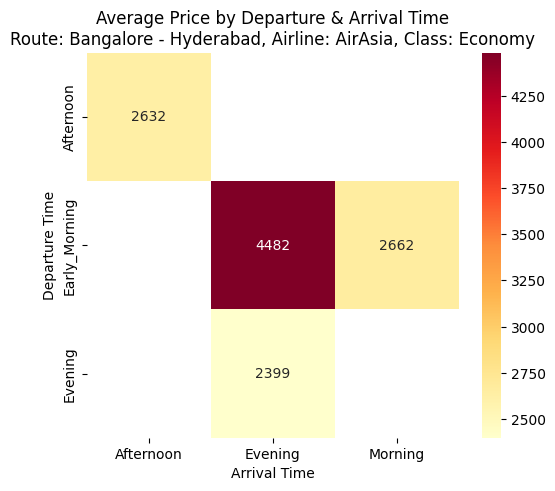

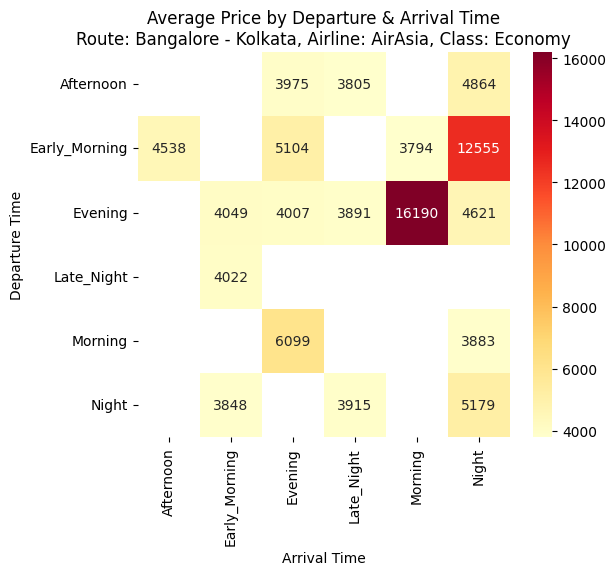

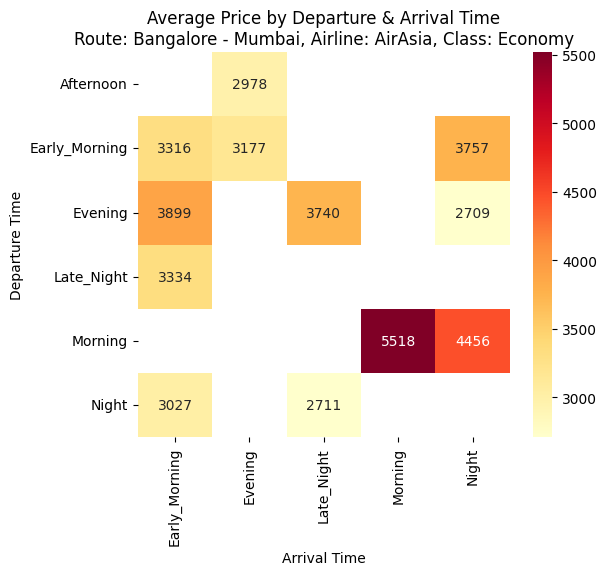

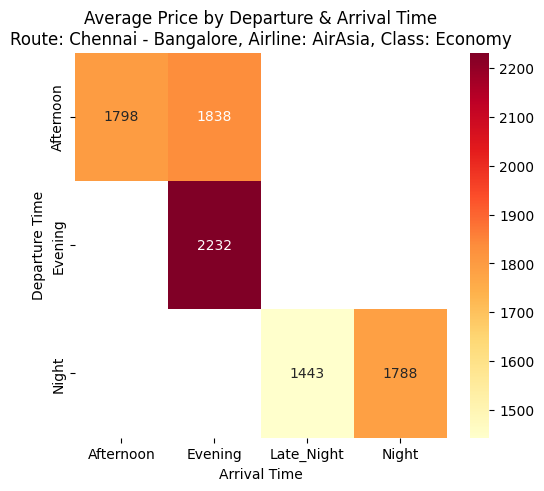

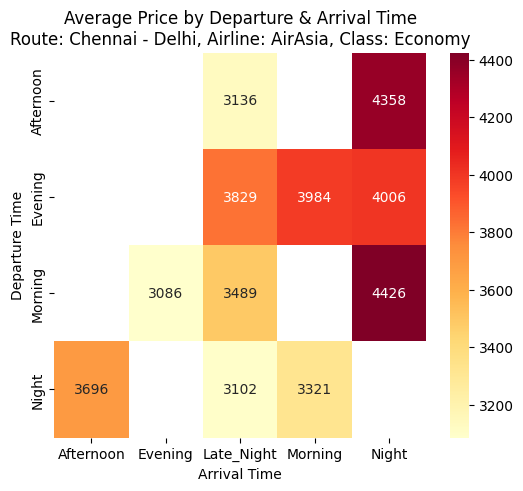

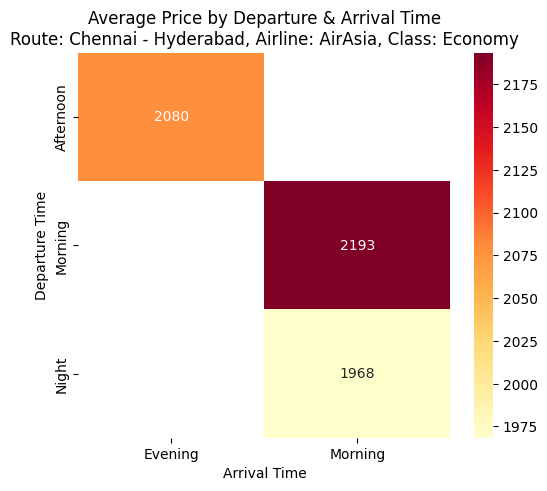

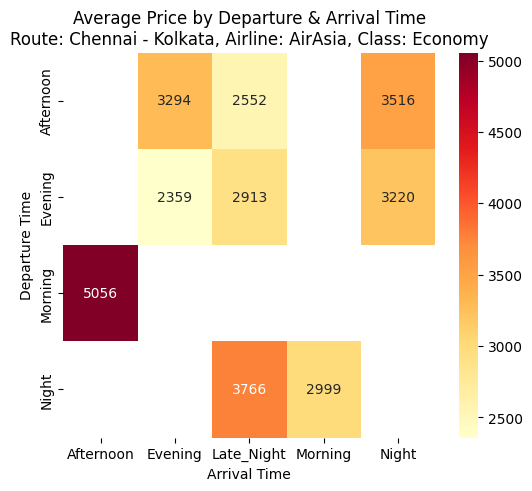

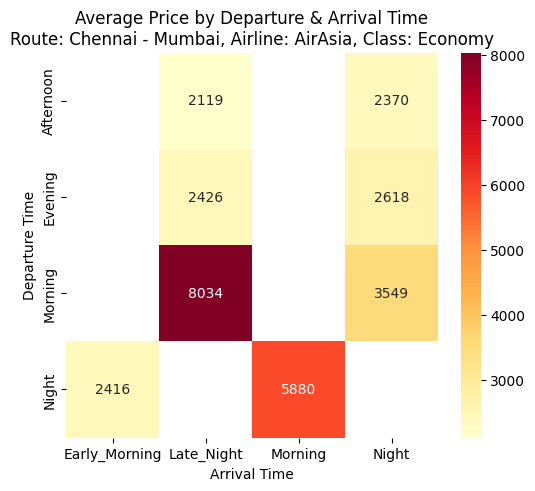

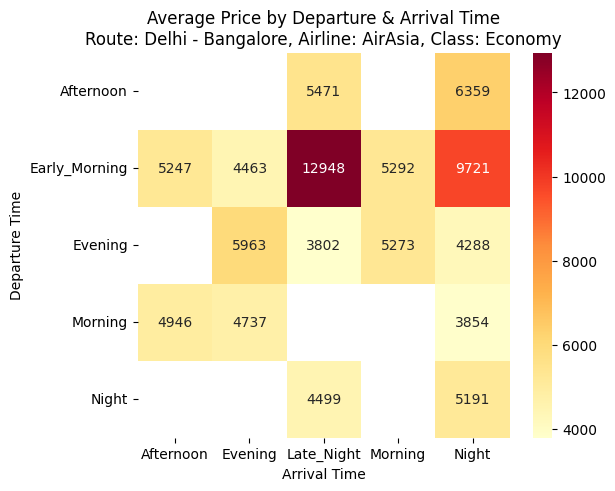

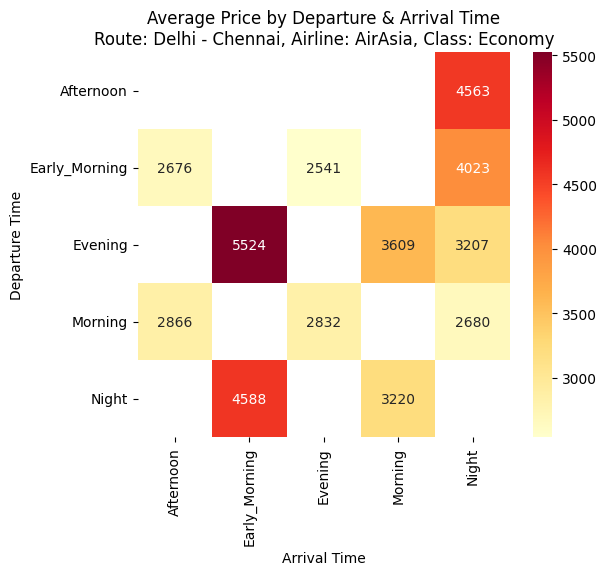

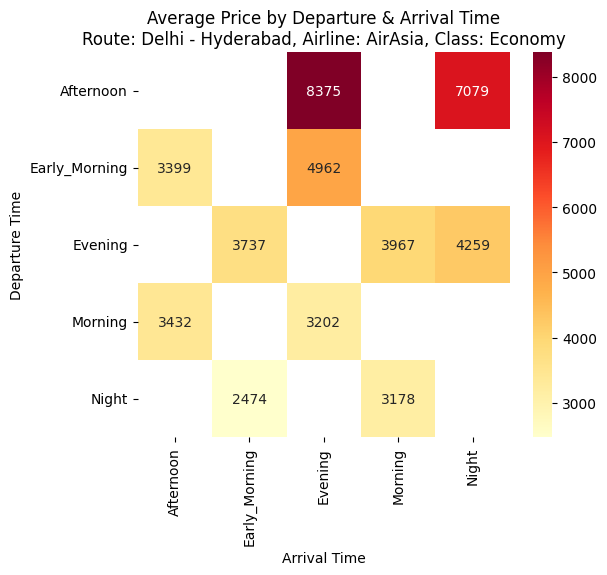

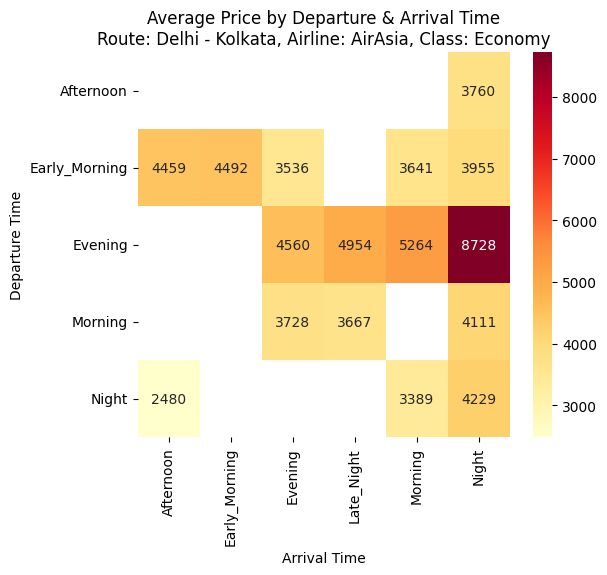

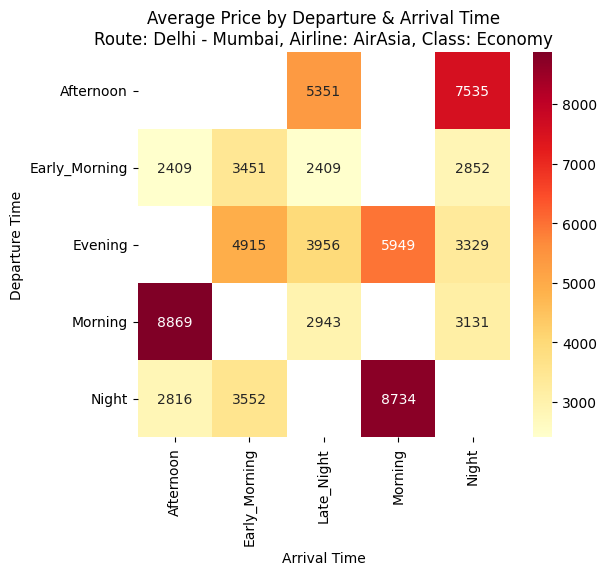

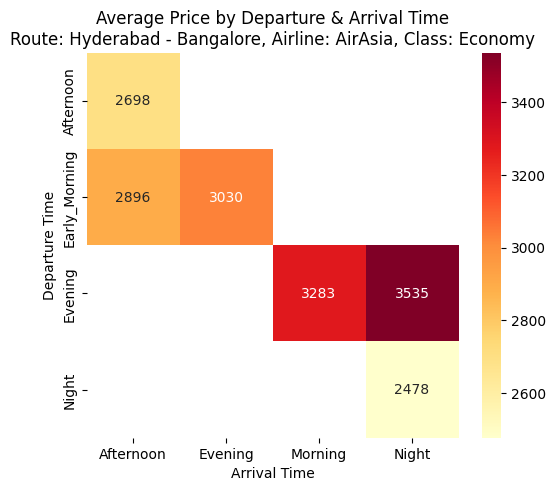

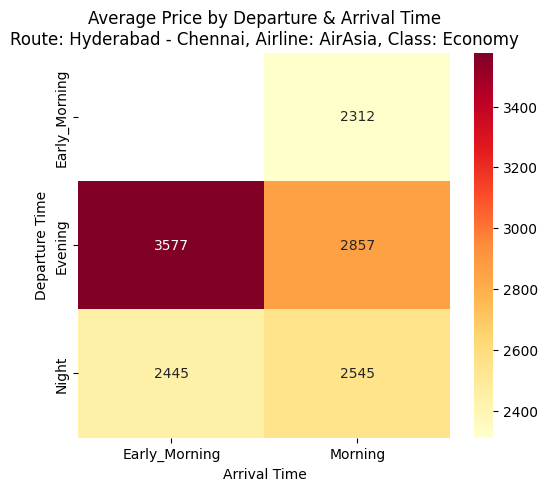

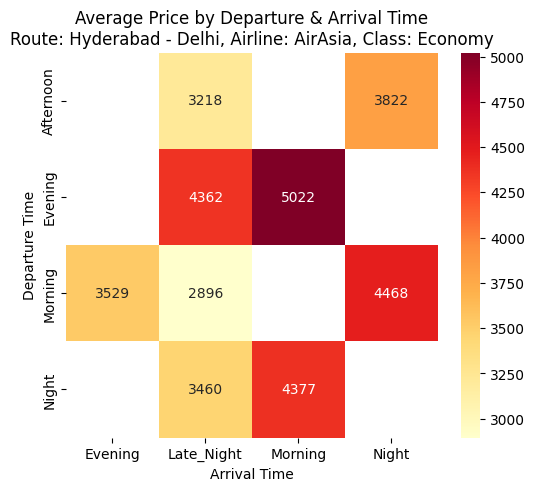

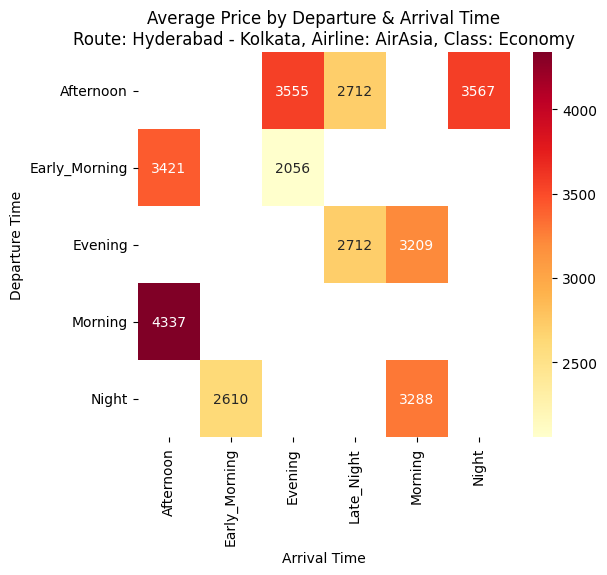

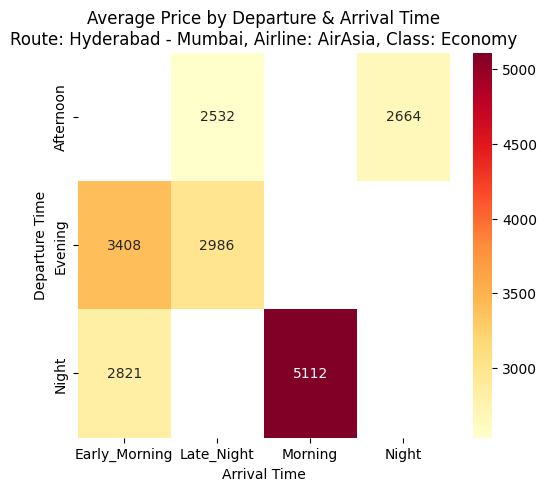

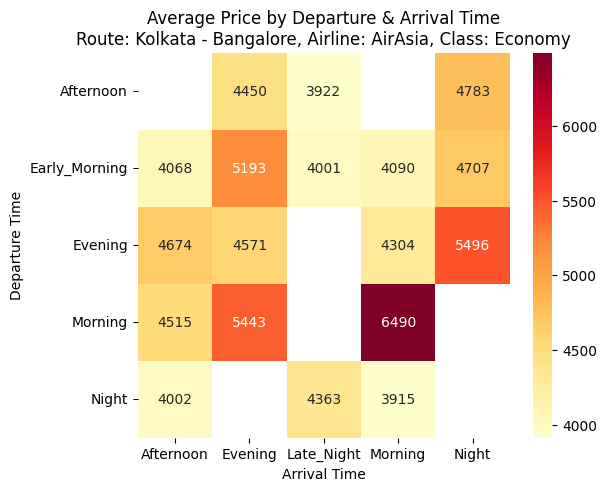

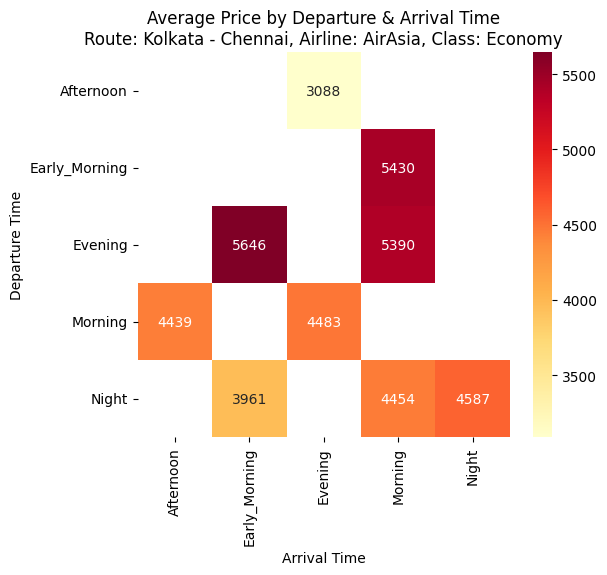

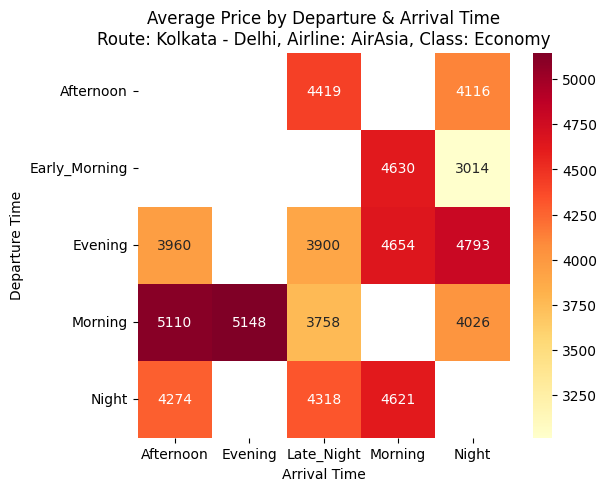

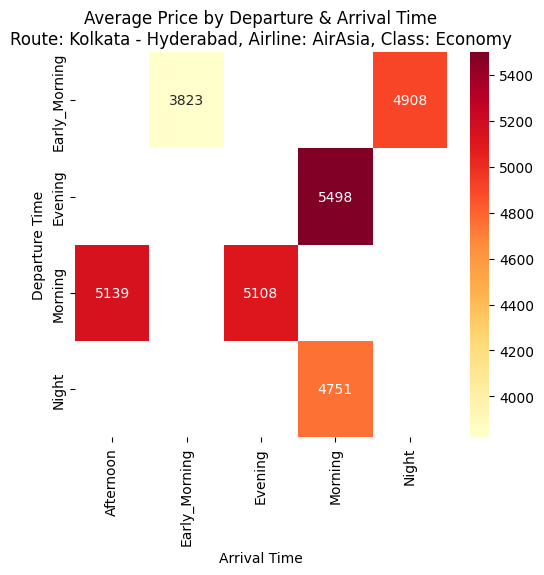

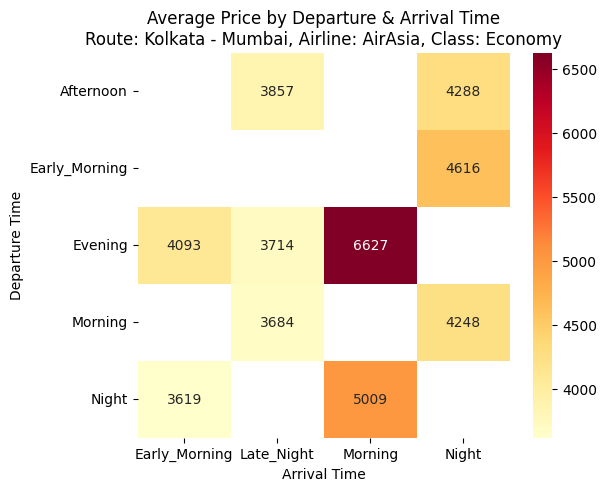

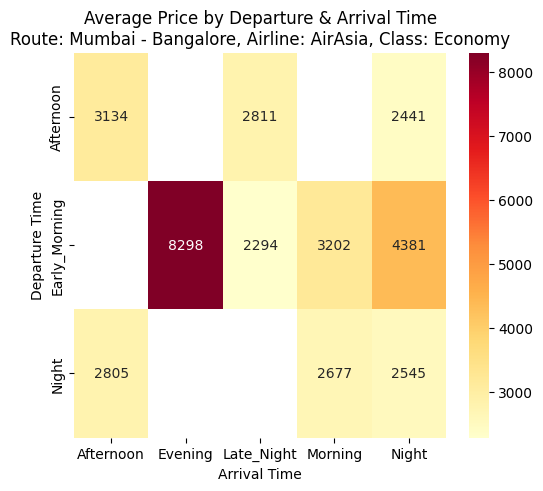

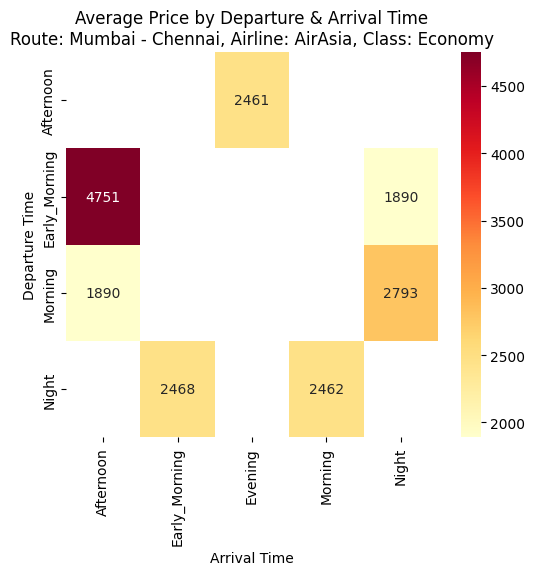

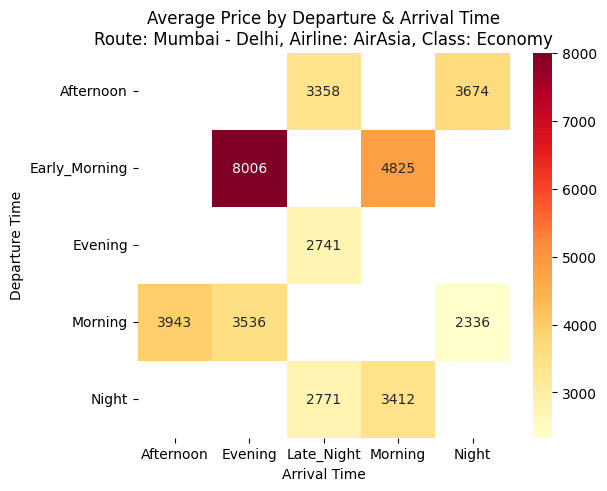

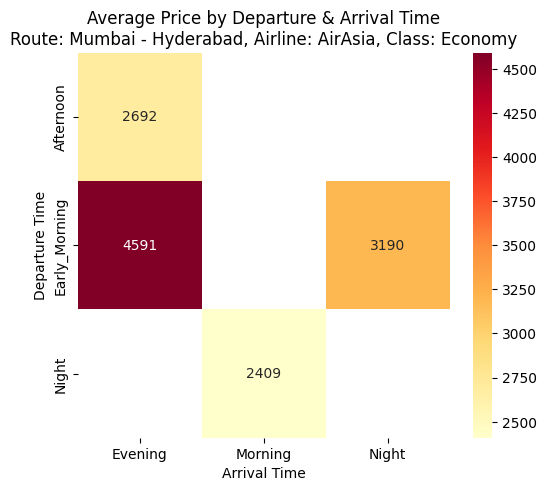

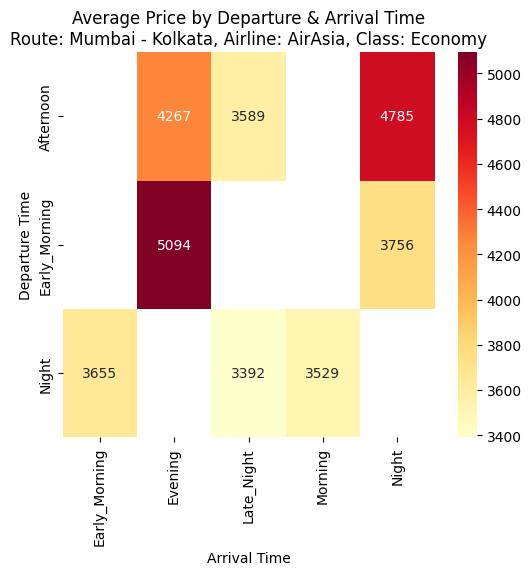

In [19]:
routes = df_grouped['route'].unique()
airline_number = 1

for route in routes:
    for airline in airlines[:airline_number]:
        for _class in flight_classes:
            df_subset = df_grouped[
                (df_grouped['route'] == route) &
                (df_grouped['airline'] == airline) &
                (df_grouped['class'] == _class)
            ]

            if df_subset.empty:
                continue

            pivot_table = df_subset.pivot_table(
                index='departure_time',
                columns='arrival_time',
                values='price'
            )

            plt.figure(figsize=(6, 5))
            sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlOrRd")
            plt.title(f"Average Price by Departure & Arrival Time\nRoute: {route}, Airline: {airline}, Class: {_class}")
            plt.ylabel("Departure Time")
            plt.xlabel("Arrival Time")
            plt.show()